## 0.**분석목표: 생존률에 영향을 미치는 영향인자 도출**

- 가설1: 선실등급은 생존에 영향을 주는 설명변수일 것이다.
- 가설2: 성별은 생존에 영향을 주는 설명변수일 것이다.
- 가설3: 나이는 생존에 영향을 주는 설명변수일 것이다.
- 가설4: 승선장소는 생존에 영향을 주는 설명변수일 것이다
- 가설5: 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.
- 가설6:함께 탑승수(형제, 배우자)는 생존에 영향을 주는 설명변수일 것이다.
- 가설7:함께 탑승수(자녀, 부모)는 생존에 영향을 주는 설명변수일 것이다.

In [61]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, minmax_scale, robust_scale

import seaborn as sns
%matplotlib inline

#matplotlib 패키지 한글 깨짐 처리 시작
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'

In [62]:
titanic =pd.read_csv("./Data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. 데이터 속성 및 기술통계량

In [79]:
# 데이터 속성
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [63]:
# 기술통계량 확인
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. 목표변수 및 설명변수 분포 확인

<AxesSubplot:xlabel='Embarked', ylabel='count'>

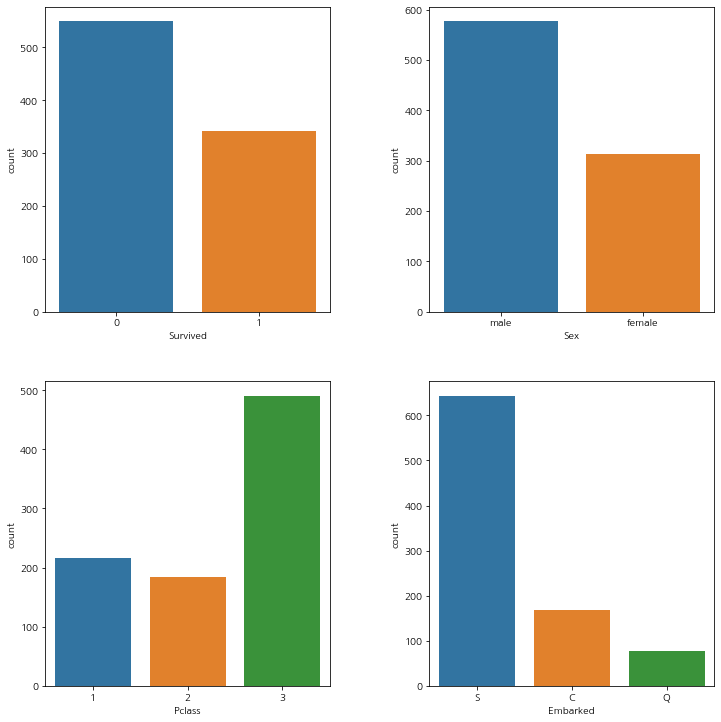

In [84]:
# 목표변수 및 이산형 변수 확인
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10, 10))
plt.tight_layout(w_pad=7, h_pad=5)
sns.countplot(x = 'Survived', data = titanic, ax=axes[0][0])
sns.countplot(x = 'Sex', data = titanic, ax=axes[0][1])
sns.countplot(x = 'Pclass', data = titanic, ax=axes[1][0])
sns.countplot(x = 'Embarked', data = titanic, ax=axes[1][1])

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

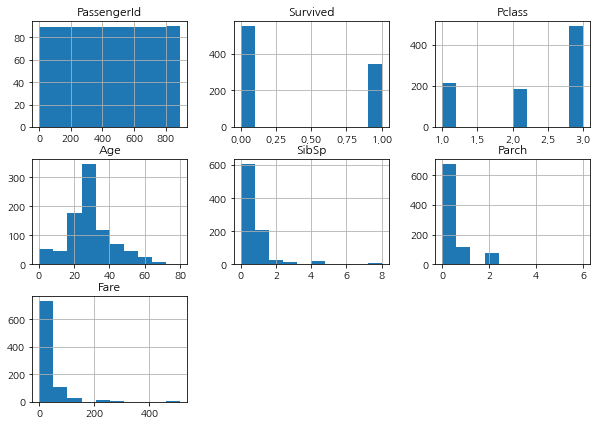

In [67]:
# 설명변수 분포 확인
titanic.hist(figsize = (10, 7))

##  3. 변수들의 결측 및 이상치 처리

In [86]:
# 결측치 처리 (Cabin 열 제거)
# titanic.isnull().sum()
# titanic["Cabin"].fillna("C85", inplace = True)

# 결측치가 너무 많아 해당 열 제거
del titanic["Cabin"]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [87]:
# Embarked열의 결측치가 적은 데이터 제거
titanic = titanic.dropna(axis=0)

In [139]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [140]:
# 생존 예측에 필요없어 보이는 열 제거 
del titanic["Name"]
del titanic["Ticket"]
del titanic['PassengerId']

KeyError: 'Name'

In [141]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 4.그래프 분석을 통해 변수간 관계 확인

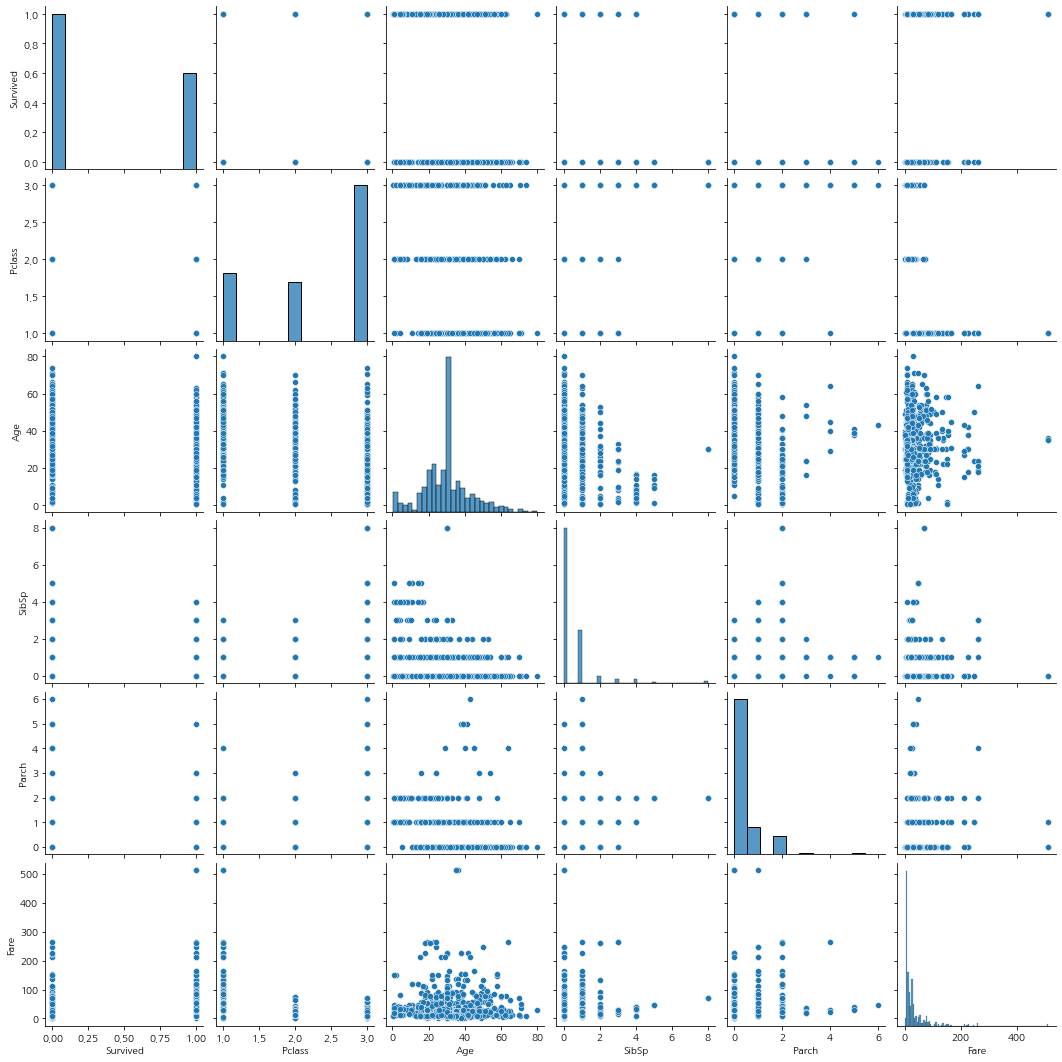

In [142]:
sns.pairplot(titanic)

### 가설에 따른 그래프 그리기
- 가설1: 선실등급은 생존에 영향을 주는 설명변수일 것이다.
- 가설2: 성별은 생존에 영향을 주는 설명변수일 것이다.
- 가설3: 나이는 생존에 영향을 주는 설명변수일 것이다.
- 가설4: 승선장소는 생존에 영향을 주는 설명변수일 것이다
- 가설5: 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.
- 가설6:함께 탑승수(형제, 배우자)는 생존에 영향을 주는 설명변수일 것이다.
- 가설7:함께 탑승수(자녀, 부모)는 생존에 영향을 주는 설명변수일 것이다.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

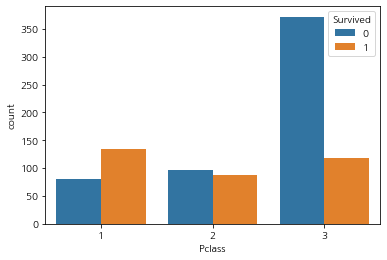

In [143]:
# 가설1: 선실등급은 생존에 영향을 주는 설명변수일 것이다.
sns.countplot(x = "Pclass", hue = "Survived", data=titanic)

<AxesSubplot:xlabel='Sex', ylabel='count'>

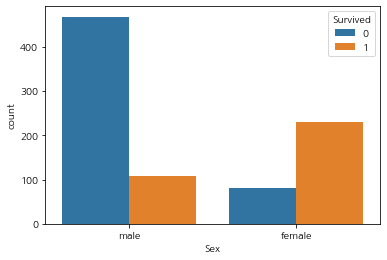

In [144]:
# 가설2: 성별은 생존에 영향을 주는 설명변수일 것이다.
sns.countplot(x = "Sex", hue = "Survived", data=titanic)

Text(0, 0.5, 'Count')

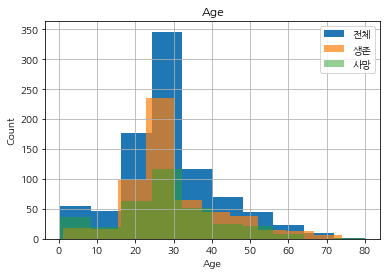

In [145]:
# 가설3: 나이는 생존에 영향을 주는 설명변수일 것이다.
titanic.hist(column = "Age", label = "전체")
plt.hist(titanic[titanic["Survived"]==0]["Age"], label="생존", alpha=0.7)
plt.hist(titanic[titanic["Survived"]==1]["Age"], label="사망", alpha=0.5)

plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

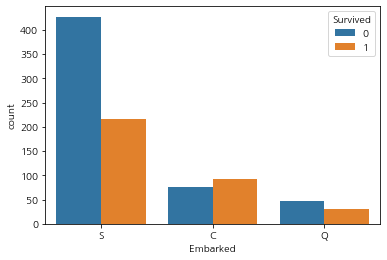

In [146]:
# 가설4: 승선장소는 생존에 영향을 주는 설명변수일 것이다

sns.countplot(x = "Embarked", hue = "Survived", data=titanic)

In [147]:
# 가설5: 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.

Text(0, 0.5, 'Count')

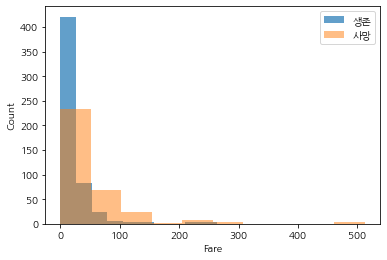

In [148]:
# titanic.hist(column = "Fare", label = "전체")
plt.hist(titanic[titanic["Survived"]==0]["Fare"], label="생존", alpha=0.7)
plt.hist(titanic[titanic["Survived"]==1]["Fare"], label="사망", alpha=0.5)

plt.legend()
plt.xlabel("Fare")
plt.ylabel("Count")

<AxesSubplot:xlabel='Parch', ylabel='count'>

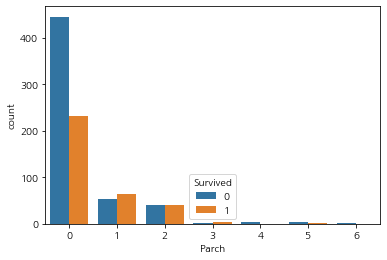

In [153]:
# 가설6: 함께 탑승수(자녀, 부모)는 생존에 영향을 주는 설명변수일 것이다.
sns.countplot(x = "Parch", hue = "Survived", data=titanic)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

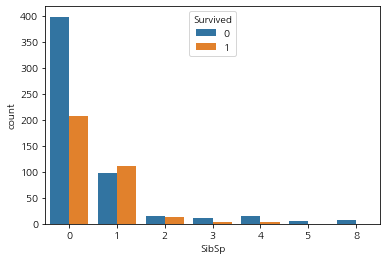

In [152]:
# 가설7:함께 탑승수(형제, 배우자)는 생존에 영향을 주는 설명변수일 것이다.
sns.countplot(x = "SibSp", hue = "Survived", data=titanic)

## 5. 생존에 영향을 미치는 잠재 인자 도출

- 가설1: 선실등급은 생존에 영향을 주는 설명변수일 것이다.
    - 3클래스에 해당하는 사람들이 사람 수 대비 훨씬 많이 사망했고, 1클래스에 해당하는 사람들이 사람 수 대비 더 많이 생존했다.
    
    
- 가설2: 성별은 생존에 영향을 주는 설명변수일 것이다.
    - 여성이 남성보다 더 많이 생존했다고 볼 수 있다.
    
    
- 가설3: 나이는 생존에 영향을 주는 설명변수일 것이다.
    - 20 ~ 30대에서는 거의 차이가 없어 보인다. 하지만 나이가 어릴 수록 더 많이 사망했고, 나이가 많을 수록 더 많이 생존했음을 보여준다. 
    
    
- 가설4: 승선장소는 생존에 영향을 주는 설명변수일 것이다
    - 승선장소에 따라 달라 보인다. Southampton에서의 사람들이 훨씬 많이 사망한데 반해, Cherbourg나 Queenstown에서는 사망자와 생존자의 비율이 거의 비슷한 양상을 보인다.


- 가설5: 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.
    - 티켓에 따라서 생존과 사망 여부가 크게 달라보이지는 않는다.


- 가설6:함께 탑승수(부모, 자녀)는 생존에 영향을 주는 설명변수일 것이다.
    - 부모, 자녀 1명 이상 같이 탑승한 경우, 0명일 때보다 생존과 사망의 비율이 비슷하다. 


- 가설7:함께 탑승수(형제, 배우자)는 생존에 영향을 주는 설명변수일 것이다.
    - 형제 배우자 1명 이상 같이 탑승한 경우, 0명일 때보다 생존과 사망의 비율이 비슷하다. 

 따라서 Pclass, Age, Sex, Embarked, Parch, Sib sp같은 변수가 설명력이 있다고 할 수 있다.
 다만 Embarked나 Parch, Sib sp같은 변수가 설명력을 가지고 있음을 확인하기 위해서는 관련 도메인 지식이 필요하다고 생각한다.